## **CONJOINT ANALYSIS**

In [1]:
### INTRODUZIONE

### **1. Survey and data collection**

The second questionnaire is structured to gather comprehensive data for conducting a conjoint analysis aimed at understanding consumer preferences for frozen fish skewers. Its purpose is to identify the most appealing combinations of product attributes to optimize the offering and align it with market demand. The key elements of the questionnaire are:

**1. Demographics**
Basic respondent information such as age, gender and location is collected to understand the consumer profile.

**2. Consumption Habits**
This section explores consumer behavior related to frozen fish products. Respondents are asked how frequently they purchase such products and what factors most influence their purchasing decisions. This part also includes some questions related to brand perception, exploring how brand recognition and trust influence purchase decisions. 

**3. Evaluation of Possible Bundles**
Participants are asked to indicate the likelihood of purchasing frozen fish skewers with different combinations of characteristics. Participants are required to assign a score from 0 to 10 to each combination, reflecting their preferences.

**4. Factors Influencing Ratings**
Participants are asked to identify which characteristics most influenced their evaluations of the frozen fish skewer combinations and they can select multiple factors. This section helps to pinpoint the attributes that drive consumer preferences and provides insights into what aspects are most critical for decision-making.

Overall, the questionnaire is designed to provide a detailed understanding of consumer preferences and trade-offs, enabling the company to design and market frozen fish skewers that resonate with its target audience. The insights gained will inform product development and strategic decision-making, ensuring a competitive and consumer-centric product offering.

#### **1.1. Bundles' Choice**

In [2]:
##spiegare obiettivo, attributi e livelli scelti, giustificare ognuno etc

In [3]:
library(radiant)
library(tidyverse)

Caricamento del pacchetto richiesto: radiant.data

Caricamento del pacchetto richiesto: magrittr

Caricamento del pacchetto richiesto: ggplot2

Caricamento del pacchetto richiesto: lubridate


Caricamento pacchetto: 'lubridate'


I seguenti oggetti sono mascherati da 'package:base':

    date, intersect, setdiff, union


Caricamento del pacchetto richiesto: tidyr


Caricamento pacchetto: 'tidyr'


Il seguente oggetto è mascherato da 'package:magrittr':

    extract


Caricamento del pacchetto richiesto: dplyr


Caricamento pacchetto: 'dplyr'


I seguenti oggetti sono mascherati da 'package:stats':

    filter, lag


I seguenti oggetti sono mascherati da 'package:base':

    intersect, setdiff, setequal, union



Caricamento pacchetto: 'radiant.data'


I seguenti oggetti sono mascherati da 'package:lubridate':

    month, wday


Il seguente oggetto è mascherato da 'package:ggplot2':

    diamonds


Il seguente oggetto è mascherato da 'package:magrittr':

    set_attr


Il seguente ogget

In [4]:
data.attribute1 <- "Panatura; Nessuna; Panko; Gratinati"
data.attribute2 <- "Tipo di pesce; Gambero; Salmone; Calamaro"
data.attribute3 <- "Tempo di Preparazione; Meno di 8; Tra 8 e 15; Più di 15"
data.attribute4 <- "Formato confezione; monoporzione; doppia porzione; formato famiglia"
data.attribute5 <- 'Spezie; Nessuna; Prezzemolo e Basilico; Salvia e Rosmarino'


data.attributes <- c(data.attribute1, data.attribute2, data.attribute3, data.attribute4, data.attribute5)

In [5]:
#come scegliere migliori bundles

In [6]:
summary(doe(data.attributes, seed = 42))

Experimental design
# trials for partial factorial: 18 
# trials for full factorial   : 243 
Random seed                   : 42 

Attributes and levels:
Panatura: Nessuna, Panko, Gratinati 
Tipo_di_pesce: Gambero, Salmone, Calamaro 
Tempo_di_Preparazione: Meno_di_8, Tra_8_e_15, Più_di_15 
Formato_confezione: monoporzione, doppia_porzione, formato_famiglia 
Spezie: Nessuna, Prezzemolo_e_Basilico, Salvia_e_Rosmarino 

Design efficiency:
 Trials D-efficiency Balanced
     11        0.554    FALSE
     12        0.731     TRUE
     13        0.651    FALSE
     14        0.704    FALSE
     15        0.653     TRUE
     16        0.703    FALSE
     17        0.352    FALSE
     18        1.000     TRUE

Partial factorial design correlations:
** Note: Variables are assumed to be ordinal **
                      Panatura Tipo_di_pesce Tempo_di_Preparazione
Panatura                     1             0                     0
Tipo_di_pesce                0             1                     0
Te

In [7]:
#quello con 18 ha efficiency 1

In [8]:
summary(doe(data.attributes, seed = 42, trials = 18))


Experimental design
# trials for partial factorial: 18 
# trials for full factorial   : 243 
Random seed                   : 42 

Attributes and levels:
Panatura: Nessuna, Panko, Gratinati 
Tipo_di_pesce: Gambero, Salmone, Calamaro 
Tempo_di_Preparazione: Meno_di_8, Tra_8_e_15, Più_di_15 
Formato_confezione: monoporzione, doppia_porzione, formato_famiglia 
Spezie: Nessuna, Prezzemolo_e_Basilico, Salvia_e_Rosmarino 

Design efficiency:
 Trials D-efficiency Balanced
     18        1.000     TRUE

Partial factorial design correlations:
** Note: Variables are assumed to be ordinal **
                      Panatura Tipo_di_pesce Tempo_di_Preparazione
Panatura                     1             0                     0
Tipo_di_pesce                0             1                     0
Tempo_di_Preparazione        0             0                     1
Formato_confezione           0             0                     0
Spezie                       0             0                     0
           

In [9]:
#verranno chieste queste 18 combinazioni ai respiondent

### **2. Data Pre-Processing**

In [10]:
file_csv <- "conjoint_rawdata.csv"
survey_raw <- read.csv(file_csv)
survey_raw

Informazioni.cronologiche,In.che.genere.ti.identifichi.,Qual.è.la.tua.età.,Qual.è.la.tua.occupazione.,Da.quante.persone.è.composto.il.tuo.nucleo.familiare.,Dove.abiti.al.momento.,Quanto.spesso.consumi.pesce.,In.media..quante.delle.volte.che.consumi.pesce..il.pesce.è.surgelato.,Che.tipo.di.pesce.surgelato.consumi...Puoi.selezionare.più.risposte.,Hai.una.marca.di.fiducia.per.l.acquisto.di.prodotti.di.pesce.surgelati.,⋯,X10..Spiedino.di.Salmone.croccanti.al.Panko.e.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.per.due.persone,X11..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.monoporzioni,X12..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.monoporzioni,X13..Spiedino.di.Gambero.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.8.15.minuti.e.venduto.in.monoporzioni,X14..Spiedino.di.Gambero.Gratinato.con.Salvia.e.Rosmarino..pronto.in.più.di.15.minuti.e.venduto.in.monoporzioni,X15..Spiedino.di.Salmone.Gratinato.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.famiglia,X16..Spiedino.di.Salmone.Gratinato.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.confezioni.per.due.persone,X17..Spiedino.di.Calamaro.Gratinato.con.nessuna.spezia..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.per.due.persone,X18..Spiedino.di.Calamaro.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.famiglia,Quali.sono.le.caratteristiche.che.hanno.influenzato.di.più.la.tua.valutazione...Puoi.selezionare.più.risposte.
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2025/01/24 10:32:13 AM CET,Femminile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti;Tranci/Filetti di pesce,No,⋯,9,8,2,8,7,2,8,3,4,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura
2025/01/24 10:33:56 AM CET,Femminile,18-25,Lavoratore,4+,Nord Italia,Mai,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,
2025/01/24 10:52:44 AM CET,Maschile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti,Si,⋯,7,10,9,8,8,7,8,10,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Presenza e combinazione di spezie
2025/01/24 11:58:14 AM CET,Femminile,60-70,Lavoratore,1,Nord Italia,Una/due volte al mese,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,⋯,8,4,2,10,10,1,8,3,0,Tipo di pesce utilizzato per lo spiedino surgelato;Formato confezione
2025/01/24 11:59:33 AM CET,Maschile,26-35,Lavoratore,1,Nord Italia,Più volte a settimana,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,⋯,7,6,6,5,5,9,7,7,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Formato confezione
2025/01/24 12:48:20 PM CET,Femminile,60-70,Lavoratore,2-4,Sud Italia e Isole,Più volte a settimana,Spesso,Condimenti per pasta o riso;,Si,⋯,6,8,6,7,6,7,5,8,8,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Tempo di preparazione
2025/01/24 2:43:49 PM CET,Femminile,46-60,Lavoratore,4+,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,No,⋯,10,10,10,10,10,10,10,10,10,Tipo di pesce utilizzato per lo spiedino surgelato;Tempo di preparazione
2025/01/24 3:18:26 PM CET,Femminile,26-35,Studente,1,Nord Italia,Più volte a settimana,Spesso,Tranci/Filetti di pesce,No,⋯,6,8,8,6,8,9,9,9,6,Presenza e tipo di panatura;Presenza e combinazione di spezie
2025/01/24 4:11:43 PM CET,Femminile,26-35,Lavoratore,2-4,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,No,⋯,4,4,2,2,2,2,8,6,2,Tipo di pesce utilizzato per lo spiedino surgelato;Tempo di preparazione;Formato confezione


We have collected 122 answers from the conjoint survey.

#### **2.1. Potential Costumers**

We wanted to understand the percentage of respondents who never eat fish...

In [11]:
count_mai <- sum(survey_raw$Quanto.spesso.consumi.pesce. == "Mai", na.rm = TRUE)
total_rows <- nrow(survey_raw)

percentage_mai <- (count_mai / total_rows) * 100

cat(sprintf("According to our data, the percentage of respondents who don't eat fish is %.2f%%\n", percentage_mai))

According to our data, the percentage of respondents who don't eat fish is 6.56%


... and those who never eat frozen fish.

In [12]:
count_nofrozen <- sum(survey_raw$In.media..quante.delle.volte.che.consumi.pesce..il.pesce.è.surgelato. == "Mai", na.rm = TRUE)
total_responses_frozen <- sum(survey_raw$Quanto.spesso.consumi.pesce. != "Mai", na.rm = TRUE)

percentage_nofrozen <- (count_nofrozen / total_responses_frozen) * 100

cat(sprintf("The percentage of respondents who don't eat frozen fish is %.2f%%\n", percentage_nofrozen))

The percentage of respondents who don't eat frozen fish is 16.67%


In [13]:
### DA SISTEMARE

A quali condizioni considereresti l'acquisto di prodotti di pesce surgelati?

Dividerei le risposte in sottocategorie come segue: Mai:

Mai

Mai, perché abito in una città sul mare

Non lo prendo in considerazione mai

Non lo mangerei mai surgelato

Non li acquisterei mai

In luoghi lontani dal mare

Se non abitassi in un posto di mare

Per necessità urgente in mancanza di pescato

In caso di emergenza

Solo se non riesco ad andare in pescheria per comprarlo fresco. Piuttosto faccio la scorta e me lo sporziono e lo congelo nel mio freezer

Se mio marito non facesse lo schifiltoso

 -> non possiamo costringerli a trasferirsi, a cambiare marito o a non andare in pescheria, quindi li escluderei a priori
Spiraglio di luce:

Se so che sono stati pescati

Che sia congelato correttamente

Per fare pietanze cotte

 -> farei una considerazione sulla "qualità"
Altro:

?
non lo considererei, sì solo ai bastoncini di pesce (son comunque prodotti di pesce surgelato, cosa mi cambia dai bastoncini di pesce agli spiedini di pesce?? nulla)
Non si possono fare molte considerazioni a mio parere su questa parte, dato che non abbiamo ottenuto risposte molto utili. Direi solo che alcuni respondents comprerebbero un prodotto surgelato solamente se viene data indicazione sull'origine del prodotto ("se so che sono stati pescati", piuttosto che presi da allevamento suppongo) o sulla modalità di congelamento. Possibile commento finale: "Nel sample che abbiamo non ci sono condizioni particolari per acquisire nuovi potenziali clienti. E' però da notare l'importanza della trasparenza nei confronti del cliente che emerge da alcune risposte: alcuni respondents affermano che comprerebbero prodotti di pesce surgelato se fossero rassicurati sull'origine e la modalità di congelamento del prodotto."

"In the sample, there are no particular conditions for acquiring new potential customers. However, it is important to note the significance of transparency towards the customer: some respondents state that they would buy frozen fish products if they were reassured about the origin and the freezing method of the product."

In [14]:
#c'è da fare considerazioni simili anche per la domanda "Quali caratteristiche di una marca ti portano a sceglierla come la tua marca di fiducia?"

After obtaining these two results, we can compute the percentage of potential customers.

In [15]:
eat_fish <- total_rows * (1 - percentage_mai / 100)
potential_customers <- eat_fish * (1 - percentage_nofrozen / 100)
percentage_potential_customers <- round((potential_customers / total_rows) * 100, 2)

cat(sprintf("The percentage of potential customers is %.2f%% of the sample.\n", percentage_potential_customers))

The percentage of potential customers is 77.87% of the sample.


#### **2.2. Data Adjustment**

In [16]:
survey_raw <- survey_raw[, !colnames(survey_raw) %in% c("Informazioni.cronologiche")]

We renamed the columns in order to simplify the analysis.

In [17]:
renamed_col <- c(
  'In.che.genere.ti.identifichi.' = 'gender',
  'Qual.è.la.tua.età.' = 'age',
  'Qual.è.la.tua.occupazione.' = 'occupation',
  'Da.quante.persone.è.composto.il.tuo.nucleo.familiare.' = 'family_size',
  'Dove.abiti.al.momento.' = 'location',
  'Quanto.spesso.consumi.pesce.' = 'fish_consumption_frequency',
  'In.media..quante.delle.volte.che.consumi.pesce..il.pesce.è.surgelato.' = 'frozen_fish_consumption_frequency',
  'Che.tipo.di.pesce.surgelato.consumi...Puoi.selezionare.più.risposte.' = 'frozen_fish_type',
  'Hai.una.marca.di.fiducia.per.l.acquisto.di.prodotti.di.pesce.surgelati.' = 'trusted_brand',
  'Quali.caratteristiche.di.una.marca.ti.portano.a.sceglierla.come.la.tua.marca.di.fiducia..' = 'reason_to_trust',
  'Tendi.ad.acquistare.sempre.il.prodotto.di.pesce.surgelato.più.economico.' = 'buy_cheapest_frozen_fish',
  'Qual.è.la.ragione.principale.per.cui.non.consumi.pesce.' = 'reason_to_not_consume',
  'A.quali.condizioni.considereresti.l.acquisto.di.prodotti.di.pesce.surgelati.' = 'conditions_to_consume',
  'X1..Spiedino.di.Gambero.con.nessuna.panatura.e.nessuna.spezia..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.famiglia' = 'Gambero_Nessuna_Nessuna_MenoDi8_Famiglia',
  'X2..Spiedino.di.Gambero.con.nessuna.panatura.ma.con.Salvia.e.Rosmarino..pronto.in.8.15.minuti.e.venduto.in.confezioni.per.2.persone' = 'Gambero_Nessuna_SalviaRosmarino_8-15_Doppia',
  'X3..Spiedino.di.salmone.con.nessuna.panatura.ma.con.Prezzemolo.e.Basilico..pronto.in.meno.di.8.minuti.e.venduto.in.monoporzioni' = 'Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono',
  'X4..Spiedino.di.Salmone.con.nessuna.panatura.e.nessuna.spezia..pronto.in.Più.di.15.minuti.e.venduto.in.Monoporzioni' = 'Salmone_Nessuna_Nessuna_PiùDi15_Mono',
  'X5..Spiedino.di.Calamaro.con.Nessuna.panatura.ma.con.Prezzemolo.e.Basilico..pronto.in.8.15.minuti.e.venduto.in.confezioni.famiglia' = 'Calamaro_Nessuna_PrezzemoloBasilico_8-15_Famiglia',
  'X6..Spiedino.di.Calamaro.con.nessuna.panatura.ma.con.Salvia.e.Rosmarino..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.da.due.persone' = 'Calamaro_Nessuna_SalviaRosmarino_PiùDi15_Doppia',
  'X7..Spiedino.di.Gambero.croccanti.al.Panko.e.con.Prezzemolo.e.Basilico..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.per.due.persone.NB..La.panatura..Panko..è.fatto.con.la.sola.mollica.di.pane.bianco.e.rende.le.fritture.particolarmente.croccanti' = 'Gambero_Panko_PrezzemoloBasilico_MenoDi8_Doppia',
  'X8..Spiedino.di.Gambero.croccanti.al.Panko.e.nessuna.spezia..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.famiglia' = 'Gambero_Panko_Nessuna_PiùDi15_Famiglia',
  'X9..Spiedino.di..Salmone.croccanti.al.Panko.e.con.Salvia.e.Rosmarino..pronto.in.8.15.minuti.e.venduto.in.confezioni.famiglia' = 'Salmone_Panko_SalviaRosmarino_8-15_Famiglia',
  'X10..Spiedino.di.Salmone.croccanti.al.Panko.e.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.per.due.persone' = 'Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia',
  'X11..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.monoporzioni' = 'Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono',
  'X12..Spiedino.di.Calamaro.croccanti.al.Panko.e.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.monoporzioni' = 'Calamaro_Panko_Nessuna_8-15_Mono',
  'X13..Spiedino.di.Gambero.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.8.15.minuti.e.venduto.in.monoporzioni' = 'Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono',
  'X14..Spiedino.di.Gambero.Gratinato.con.Salvia.e.Rosmarino..pronto.in.più.di.15.minuti.e.venduto.in.monoporzioni' = 'Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono',
  'X15..Spiedino.di.Salmone.Gratinato.con.Salvia.e.Rosmarino..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.famiglia' = 'Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia',
  'X16..Spiedino.di.Salmone.Gratinato.con.nessuna.spezia..pronto.in.8.15.minuti.e.venduto.in.confezioni.per.due.persone' = 'Salmone_Gratinato_Nessuna_8-15_Doppia',
  'X17..Spiedino.di.Calamaro.Gratinato.con.nessuna.spezia..pronto.in.meno.di.8.minuti.e.venduto.in.confezioni.per.due.persone' = 'Calamaro_Gratinato_Nessuna_MenoDi8_Doppia',
  'X18..Spiedino.di.Calamaro.Gratinato.con.Prezzemolo.e.Basilico..pronto.in.più.di.15.minuti.e.venduto.in.confezioni.famiglia' = 'Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia',
  'Quali.sono.le.caratteristiche.che.hanno.influenzato.di.più.la.tua.valutazione...Puoi.selezionare.più.risposte.' = 'major_influences'
)

colnames(survey_raw) <- renamed_col[colnames(survey_raw)]

In [18]:
survey_raw

gender,age,occupation,family_size,location,fish_consumption_frequency,frozen_fish_consumption_frequency,frozen_fish_type,trusted_brand,reason_to_trust,⋯,Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia,Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono,Calamaro_Panko_Nessuna_8-15_Mono,Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono,Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono,Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia,Salmone_Gratinato_Nessuna_8-15_Doppia,Calamaro_Gratinato_Nessuna_MenoDi8_Doppia,Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia,major_influences
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
Femminile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti;Tranci/Filetti di pesce,No,,⋯,9,8,2,8,7,2,8,3,4,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura
Femminile,18-25,Lavoratore,4+,Nord Italia,Mai,,,,,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,
Maschile,18-25,Studente,2-4,Nord Italia,Una volta a settimana,Poche volte,Piatti pronti,Si,Gusto e convenienza,⋯,7,10,9,8,8,7,8,10,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Presenza e combinazione di spezie
Femminile,60-70,Lavoratore,1,Nord Italia,Una/due volte al mese,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,,⋯,8,4,2,10,10,1,8,3,0,Tipo di pesce utilizzato per lo spiedino surgelato;Formato confezione
Maschile,26-35,Lavoratore,1,Nord Italia,Più volte a settimana,Spesso,Condimenti per pasta o riso;Tranci/Filetti di pesce,No,,⋯,7,6,6,5,5,9,7,7,9,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Formato confezione
Femminile,60-70,Lavoratore,2-4,Sud Italia e Isole,Più volte a settimana,Spesso,Condimenti per pasta o riso;,Si,"Il sapore,la consistenza",⋯,6,8,6,7,6,7,5,8,8,Tipo di pesce utilizzato per lo spiedino surgelato;Presenza e tipo di panatura;Tempo di preparazione
Femminile,46-60,Lavoratore,4+,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,No,,⋯,10,10,10,10,10,10,10,10,10,Tipo di pesce utilizzato per lo spiedino surgelato;Tempo di preparazione
Femminile,26-35,Studente,1,Nord Italia,Più volte a settimana,Spesso,Tranci/Filetti di pesce,No,,⋯,6,8,8,6,8,9,9,9,6,Presenza e tipo di panatura;Presenza e combinazione di spezie
Femminile,26-35,Lavoratore,2-4,Nord Italia,Una volta a settimana,Poche volte,Tranci/Filetti di pesce,No,,⋯,4,4,2,2,2,2,8,6,2,Tipo di pesce utilizzato per lo spiedino surgelato;Tempo di preparazione;Formato confezione


#### **2.3. EDA Analysis**

In [19]:
#plot dati

In [20]:
install.packages('gridExtra')

Installazione pacchetto in 'C:/Users/melis/AppData/Local/R/win-library/4.4'
(perché 'lib' non è specificato)



pacchetto 'gridExtra' aperto con successo con controllo somme MD5

I pacchetti binari scaricati sono in
	C:\Users\melis\AppData\Local\Temp\RtmpOOEOPy\downloaded_packages



Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine


Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(column)

  # Now:
  data %>% select(all_of(column))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


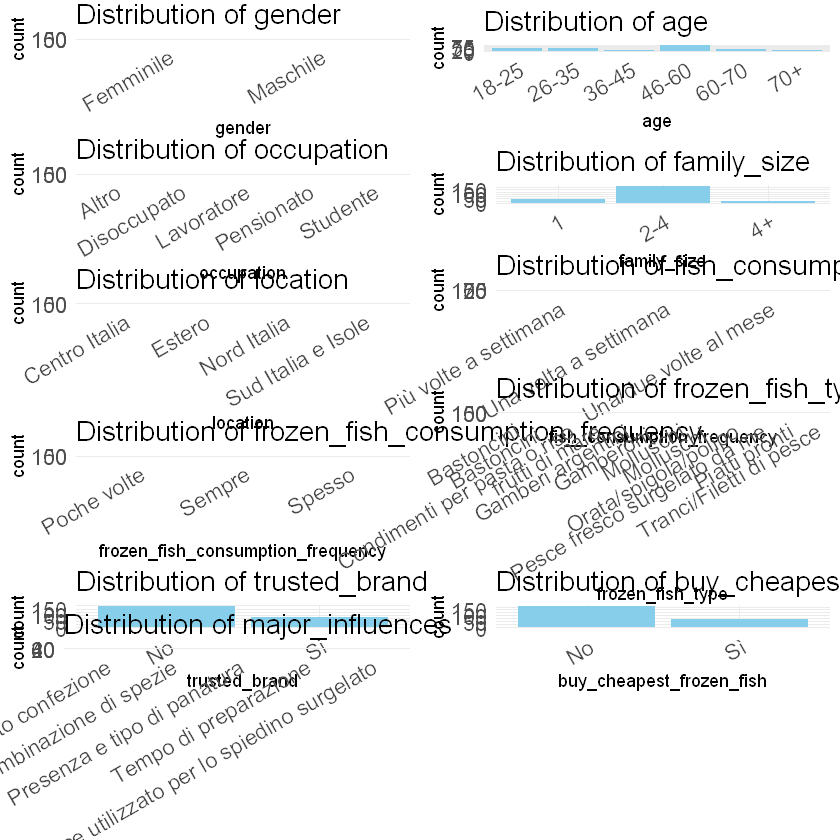

In [21]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)

plot_bar_grid <- function(df, columns, cols = 1, explode_columns = NULL, delimiter = ',') {
  # If no explode_columns provided, initialize as empty
  if (is.null(explode_columns)) {
    explode_columns <- list()
  }
  
  # Copy the original dataframe
  processed_df <- df
  
  # Explode columns with multiple choices
  for (column in explode_columns) {
    if (column %in% colnames(processed_df)) {
      processed_df <- processed_df %>% 
        drop_na(column) %>%
        mutate(!!column := strsplit(as.character(!!sym(column)), delimiter)) %>%
        unnest(!!sym(column))  # Explode the column
    }
  }
  
  total_plots <- length(columns)
  rows <- ceiling(total_plots / cols)
  
  plot_list <- list()
  
  # Loop through the columns and create plots
  for (column in columns) {
    if (column %in% colnames(processed_df)) {
      plot <- ggplot(processed_df, aes_string(x = column)) +
        geom_bar(fill = "skyblue") +
        theme_minimal() +
        ggtitle(paste("Distribution of", column)) +
        theme(axis.text.x = element_text(angle = 30, hjust = 1, size = 13),
              axis.text.y = element_text(size = 13),
              plot.title = element_text(size = 17))
      plot_list[[length(plot_list) + 1]] <- plot
    }
  }
  
  # Arrange plots in a grid layout
  grid.arrange(grobs = plot_list, ncol = cols, nrow = rows)
}

# Example of columns to plot and the exploded columns
columns_to_plot <- c(
  'gender', 'age', 'occupation', 'family_size', 'location',
  'fish_consumption_frequency', 'frozen_fish_consumption_frequency',
  'frozen_fish_type', 'trusted_brand', 'buy_cheapest_frozen_fish',
  'major_influences'
)

# Assuming 'survey_raw' is your dataframe
plot_bar_grid(
  survey_raw, 
  columns_to_plot, 
  cols = 2, 
  explode_columns = c('frozen_fish_type', 'major_influences'), 
  delimiter = ';'
)


In [22]:
## DA SISTEMAREE E COMMENTARE

After this initial analysis, we will consider only those who consume frozen fish to proceed with our work.

In [23]:
survey_raw <- survey_raw %>%
  filter(!(fish_consumption_frequency == 'Mai' | frozen_fish_consumption_frequency == 'Mai'))

In [24]:
survey_raw <- survey_raw %>%
  mutate(id_respondent = 1:n())

We added an id for every respondent.

We selected columns relevant for the conjoint analysis

In [25]:
relevant_columns <- c(14:31, ncol(survey_raw))  # Indices for relevant columns
survey_data <- survey_raw[, relevant_columns]  # Select relevant columns

In [26]:
head(survey_data)

,Gambero_Nessuna_Nessuna_MenoDi8_Famiglia,Gambero_Nessuna_SalviaRosmarino_8-15_Doppia,Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono,Salmone_Nessuna_Nessuna_PiùDi15_Mono,Calamaro_Nessuna_PrezzemoloBasilico_8-15_Famiglia,Calamaro_Nessuna_SalviaRosmarino_PiùDi15_Doppia,Gambero_Panko_PrezzemoloBasilico_MenoDi8_Doppia,Gambero_Panko_Nessuna_PiùDi15_Famiglia,Salmone_Panko_SalviaRosmarino_8-15_Famiglia,Salmone_Panko_PrezzemoloBasilico_PiùDi15_Doppia,Calamaro_Panko_SalviaRosmarino_MenoDi8_Mono,Calamaro_Panko_Nessuna_8-15_Mono,Gambero_Gratinato_PrezzemoloBasilico_8-15_Mono,Gambero_Gratinato_SalviaRosmarino_PiùDi15_Mono,Salmone_Gratinato_SalviaRosmarino_MenoDi8_Famiglia,Salmone_Gratinato_Nessuna_8-15_Doppia,Calamaro_Gratinato_Nessuna_MenoDi8_Doppia,Calamaro_Gratinato_PrezzemoloBasilico_PiùDi15_Famiglia,id_respondent
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,5,3,2,4,3,9,6,7,9,8,2,8,7,2,8,3,4,1
2,8,8,6,7,8,6,8,8,7,7,10,9,8,8,7,8,10,9,2
3,5,9,10,7,0,6,10,2,0,8,4,2,10,10,1,8,3,0,3
4,10,8,6,5,8,7,8,10,9,7,6,6,5,5,9,7,7,9,4
5,6,7,6,5,8,8,6,8,6,6,8,6,7,6,7,5,8,8,5
6,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,6


In [27]:
columns_to_melt <- names(survey_data)[1:(ncol(survey_data) - 1)]  # All columns except the last one
columns_to_keep <- names(survey_data)[ncol(survey_data)]  # The last column

# Melt the data
conjoint_data <- survey_data %>%
  pivot_longer(cols = all_of(columns_to_melt), 
               names_to = "Question", 
               values_to = "Rating") %>%
  arrange(id_respondent)  # Sort by respondent ID

row.names(conjoint_data) <- NULL

In [28]:
head(conjoint_data)

id_respondent,Question,Rating
<int>,<chr>,<int>
1,Gambero_Nessuna_Nessuna_MenoDi8_Famiglia,4
1,Gambero_Nessuna_SalviaRosmarino_8-15_Doppia,5
1,Salmone_Nessuna_PrezzemoloBasilico_MenoDi8_Mono,3
1,Salmone_Nessuna_Nessuna_PiùDi15_Mono,2
1,Calamaro_Nessuna_PrezzemoloBasilico_8-15_Famiglia,4
1,Calamaro_Nessuna_SalviaRosmarino_PiùDi15_Doppia,3


We splitted the questions of preferred bundles in order to obtain different answers for each attribute of the bundle

In [29]:
split_columns <- strsplit(as.character(conjoint_data$Question), "_")

split_columns_df <- do.call(rbind, split_columns)
colnames(split_columns_df) <- c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione")

conjoint_data <- cbind(conjoint_data, split_columns_df)

conjoint_data$Question <- NULL
head(conjoint_data)

,id_respondent,Rating,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,4,Gambero,Nessuna,Nessuna,MenoDi8,Famiglia
2,1,5,Gambero,Nessuna,SalviaRosmarino,8-15,Doppia
3,1,3,Salmone,Nessuna,PrezzemoloBasilico,MenoDi8,Mono
4,1,2,Salmone,Nessuna,Nessuna,PiùDi15,Mono
5,1,4,Calamaro,Nessuna,PrezzemoloBasilico,8-15,Famiglia
6,1,3,Calamaro,Nessuna,SalviaRosmarino,PiùDi15,Doppia


In [30]:
conjoint_data$Rating <- conjoint_data$Rating * 10
head(conjoint_data)

,id_respondent,Rating,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,40,Gambero,Nessuna,Nessuna,MenoDi8,Famiglia
2,1,50,Gambero,Nessuna,SalviaRosmarino,8-15,Doppia
3,1,30,Salmone,Nessuna,PrezzemoloBasilico,MenoDi8,Mono
4,1,20,Salmone,Nessuna,Nessuna,PiùDi15,Mono
5,1,40,Calamaro,Nessuna,PrezzemoloBasilico,8-15,Famiglia
6,1,30,Calamaro,Nessuna,SalviaRosmarino,PiùDi15,Doppia


The table obtained above allows us to understand the rating given by each respondent for each combination of attributes proposed (=bundle). This will enable us to conduct the conjoint analysis, aiming to understand which attributes consumers consider most relevant. The ratings were initially on a 0-10 scale and were later transformed to a 0-100 scale for ease of analysis.

### **3. Conjoint Analysis**

In [36]:
respondent1 <- conjoint_data %>% filter(id_respondent == 1)

In [37]:
respondent1

id_respondent,Rating,Tipo_di_Pesce,Panatura,Spezie,Tempo_di_Preparazione,Formato_Confezione
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,40,Gambero,Nessuna,Nessuna,MenoDi8,Famiglia
1,50,Gambero,Nessuna,SalviaRosmarino,8-15,Doppia
1,30,Salmone,Nessuna,PrezzemoloBasilico,MenoDi8,Mono
1,20,Salmone,Nessuna,Nessuna,PiùDi15,Mono
1,40,Calamaro,Nessuna,PrezzemoloBasilico,8-15,Famiglia
1,30,Calamaro,Nessuna,SalviaRosmarino,PiùDi15,Doppia
1,90,Gambero,Panko,PrezzemoloBasilico,MenoDi8,Doppia
1,60,Gambero,Panko,Nessuna,PiùDi15,Famiglia
1,70,Salmone,Panko,SalviaRosmarino,8-15,Famiglia


In [38]:
conjoint_respondent1 <- conjoint(respondent1, rvar="rating", evar=c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione"))

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `rating` doesn't exist.


In [ ]:
summary(conjoint_respondent1)

In [ ]:
plot(conjoint_respondent1)

In [ ]:
conjoint_total <- conjoint(survey, rvar="rating", evar=c("Tipo_di_Pesce", "Panatura", "Spezie", "Tempo_di_Preparazione", "Formato_Confezione"))

In [ ]:
summary(conjoint_total)